In [1]:
import sys
sys.path.append('/Users/qingjunwang/Documents/code/python')
import main_check_focus_exp as main

In [2]:
folder='/Users/qingjunwang/Documents/image files/speckle 2 study/EPIC-FL2/random-SingleExposureImages'

In [3]:
main.find_the_infocus_image(folder)

Image with highest contrast: EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z34.551_Exp294.png
Contrast: 1.4339596755734347


'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z34.551_Exp294.png'

In [4]:
z_options_array=main.z_plane(folder)

[34.551 34.501 34.451 34.401 34.351 34.301 34.251 34.201 34.151 34.101
 34.051 34.001 33.951 33.901 33.851 33.801 33.751 33.701 33.651 33.601
 33.551 33.501 33.451 33.401 33.351 33.301 33.251 33.201 33.151 33.101
 33.051 33.001 32.951 32.901 32.851 32.801 32.751 32.701 32.651 32.601
 32.551 32.501 32.451 32.401 32.351 32.301 32.251 32.201 32.151 32.101
 32.051 32.001 31.951 31.901 31.851 31.801 31.751 31.701 31.651 31.601
 31.551 31.501 31.451 31.401 31.351 31.301 31.251 31.201 31.151 31.101
 31.051 31.001 30.951 30.901 30.851 30.801 30.751 30.701 30.651 30.601
 30.551 30.501 30.451 30.401 30.351 30.301 30.251 30.201 30.151 30.101
 30.051 30.001 29.951 29.901 29.851 29.801 29.751 29.701 29.651 29.601]
num of z planes: 100


In [5]:
# create an array of files
#def file_array(folder):
import os
import numpy as np
files = os.listdir(folder)
file_names = []

# select files with the same exposure time
for file in files:
    if ".DS_Store" not in file:
        file_names.append(file)
file_names = np.array(file_names)

# # Replace the specified value
# file_names[file_names == overexposure_file[2]] = 'EPIC-FL1_D0C0_NAP-8um-P20-0r_Green__X0.000_Y0.000_Z-0.000_Exp14639.png'
# file_names[file_names == overexposure_file[1]] = 'EPIC-FL1_D0C0_NAP-8um-P20-0r_Green__X0.000_Y0.000_Z-0.250_Exp38261.png'

print(file_names)
print(file_names.size)

['EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z31.951_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z33.301_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z29.901_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z32.001_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z30.251_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z32.801_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z31.151_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z32.701_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z33.401_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z31.651_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z29.601_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z30.551_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-Random_Green__X0.000_Y0.000_Z29.701_Exp23286.png'
 'EPIC-FL2_D0C0_YSSI-P20-

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store the images
images = []
i=0

# For each file
for file in file_names:
    # Extract the Z value from the file name
    file_path = os.path.join(folder, file)
    z_value = float(file.split('_Z')[1].split('_')[0])
    # If the Z value is less than 33.551
    if z_value < 33.551:
        # Read the image
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        #img = np.roll(img, shift=0, axis=(0, 1))
        # Add the image to the list
        #images.append(img)
        img_z_intensity = [[element * intensity_per_z[i] for element in sublist] for sublist in img]
        images.append(img_z_intensity)

        if i==0:
            contrast_min=np.std(img)/np.mean(img)
            best_file=img
            contrast_max=np.std(img)/np.mean(img)
            worst_file=img
        if i>0:
            if np.std(img)/np.mean(img)< contrast_min:
                contrast_min= np.std(img)/np.mean(img)
                best_file=img
                #print(f"min update {file_path}")
            if np.std(img)/np.mean(img)> contrast_max:
                contrast_max= np.std(img)/np.mean(img)
                worst_file=img
                #print(f"max update {file_path}")
        i=i+1
        
# Convert the list of images to a numpy array
images = np.array(images)
#print(images)
# Calculate the average of the images
average_image = np.mean(images, axis=0)

normalized_average_image= average_image/average_image.max()*255
normalized_best_image=best_file/best_file.max()*255
normalized_worst_image=worst_file/worst_file.max()*255

# Calculate the mean of the image
print(f"average_image contrast={np.std(normalized_image)/np.mean(normalized_image)},with {i} files of average, each has 50um Z difference")
print(f"Min single image contrast={contrast_min}")
print(f"max single image contrast={contrast_max}")

cv2.imwrite('/Users/qingjunwang/Documents/image files/speckle 2 study/EPIC-FL2/normalized_average_image_z.png', normalized_average_image)
cv2.imwrite('/Users/qingjunwang/Documents/image files/speckle 2 study/EPIC-FL2/normalized_best_image.png', normalized_best_image)
cv2.imwrite('/Users/qingjunwang/Documents/image files/speckle 2 study/EPIC-FL2/normalized_worst_image.png', normalized_worst_image)

# Display the average image
plt.imshow(average_image, cmap='gray')
plt.show()

NameError: name 'intensity_per_z' is not defined

In [237]:
array1=[[1,1,1],
        [1,1,1],
        [1,1,1]
       ]
array2=[[3,3,3],
        [3,3,3],
       [3,3,3]]
array3=[[5,5,5],
        [5,5,5],
        [5,5,5]]

array_master=[]
array_master.append(array1)

array22 = [[element * 3 for element in sublist] for sublist in array2]
array_master.append(array22)

array_master.append(array3)
#array_master=np.array(array_master)


np.mean(array_master,axis=0)

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [230]:
array2 = [[element * 2 for element in sublist] for sublist in array2]

In [200]:
images

array([[[29, 30, 35, ..., 44, 37, 29],
        [27, 31, 37, ..., 39, 35, 30],
        [29, 31, 37, ..., 36, 32, 29],
        ...,
        [35, 36, 36, ..., 43, 39, 38],
        [34, 33, 35, ..., 50, 42, 38],
        [31, 32, 36, ..., 46, 42, 35]],

       [[31, 33, 38, ..., 33, 30, 28],
        [36, 35, 34, ..., 35, 37, 35],
        [37, 36, 35, ..., 39, 37, 37],
        ...,
        [38, 40, 44, ..., 32, 35, 37],
        [32, 34, 41, ..., 26, 29, 31],
        [27, 34, 42, ..., 28, 24, 27]],

       [[31, 28, 29, ..., 33, 33, 35],
        [31, 31, 31, ..., 39, 37, 34],
        [31, 31, 32, ..., 44, 38, 33],
        ...,
        [25, 29, 33, ..., 22, 21, 24],
        [25, 23, 29, ..., 22, 24, 24],
        [28, 27, 29, ..., 28, 29, 29]],

       ...,

       [[38, 37, 36, ..., 37, 39, 37],
        [48, 46, 43, ..., 48, 52, 51],
        [57, 53, 46, ..., 56, 59, 63],
        ...,
        [34, 32, 28, ..., 27, 30, 34],
        [31, 27, 27, ..., 26, 30, 31],
        [29, 31, 29, ..., 31, 30

In [52]:
# Q factor estimation

In [ ]:
#assumption:
Low Q system, no wavelength selection

# Calculate efficiency

In [86]:
import numpy as np

In [146]:
################### design of the cavity, and the assumptions
R=0.9
T=1-R
cavity_thickness = 0.5  # in mm
angle_degrees= 8 # 20 in total
PIC_width=6 # in mm
power_threshold=0.1 # when Tn=power_z_threshold*T0
threshold=0.99 # the total power output from cavity before stop calculation

In [112]:
np.tan(angle_radians) * cavity_thickness

0.07027041735119571

In [147]:
################## calculate total times of reflection and  broadening width
# For each n from 0 to 1000
def eff_calculator(R,cavity_thickness,PIC_width):
    T=1-R
    for nrange in range(0,100000,1):
        sum = 0
        intensity_arr=[]
        for i in range(nrange):# from 0 to nrange-1
            sum += T * R**i
            intensity_arr.append(T * R**i)
        if sum>threshold:
            n=nrange
            print(f"check the sum: {sum}, if sum close to {threshold}, then it means the step size is good")
            break
    #assume PIC 6mm, but it doesn't matter what's the original size
    angle_radians = np.radians(angle_degrees) #print(f"angle_radians={angle_radians}")
    def walking_length(n):
        return np.tan(angle_radians) * cavity_thickness*4*n
    
    def total_length(n):
        return PIC_width+walking_length(n)
        
    print(f"total reflection times = {n} times")
    print(f"total walk_length= {walking_length(n)} in mm")
    #################### find the number of high intensity emission plane
    intensity_per_z=[]
    sum = 0
    count = 0
    for i in range(n):
        sum += T * R**i
        if T * R**i>power_threshold*T * R**0:
            count+=1
        intensity_per_z.append(T * R**i)
        #print(sum,T * R**i)
        if T * R**i<power_threshold*T * R**0:
            break
    print(intensity_per_z)

    intensity_per_z= np.array(intensity_per_z)
    print(f"reflection times when transmission drop to {power_threshold} of T0 = {count} times")  
    
    #################find the efficiency
    sum_energy = 0
    for i in range(n):
        sum_energy+=T * R**i* ((PIC_width**2)/(total_length(i)**2))
        #print("energy output",T * R**i* ((PIC_width**2)/(total_length(i)**2)))
    print(f"efficiency={sum_energy}")
    
    return n, sum_energy,count, intensity_arr

In [148]:
R=0.9
d=0.075
PICwidth=6
_, _, _, intensity_arr = eff_calculator(R, d, PICwidth)
# Use the intensity_arr for further processing or analysis

check the sum: 0.9903022627021246, if sum close to 0.99, then it means the step size is good
total reflection times = 44 times
total walk_length= 1.8551390180715666 in mm
[0.09999999999999998, 0.08999999999999998, 0.08099999999999999, 0.07289999999999999, 0.06560999999999999, 0.059049, 0.05314409999999999, 0.047829689999999994, 0.043046721, 0.0387420489, 0.03486784401, 0.031381059609, 0.028242953648100005, 0.025418658283290003, 0.022876792454961003, 0.020589113209464903, 0.01853020188851841, 0.016677181699666574, 0.015009463529699915, 0.013508517176729925, 0.012157665459056933, 0.010941898913151239, 0.009847709021836116]
reflection times when transmission drop to 0.1 of T0 = 22 times
efficiency=0.8885358606882103


In [149]:
print("Intensity Array:", intensity_arr)
print("Intensity Array:", len(intensity_arr))

Intensity Array: [0.09999999999999998, 0.08999999999999998, 0.08099999999999999, 0.07289999999999999, 0.06560999999999999, 0.059049, 0.05314409999999999, 0.047829689999999994, 0.043046721, 0.0387420489, 0.03486784401, 0.031381059609, 0.028242953648100005, 0.025418658283290003, 0.022876792454961003, 0.020589113209464903, 0.01853020188851841, 0.016677181699666574, 0.015009463529699915, 0.013508517176729925, 0.012157665459056933, 0.010941898913151239, 0.009847709021836116, 0.008862938119652504, 0.007976644307687254, 0.0071789798769185285, 0.006461081889226676, 0.0058149737003040085, 0.005233476330273608, 0.004710128697246248, 0.004239115827521623, 0.0038152042447694608, 0.0034336838202925143, 0.003090315438263263, 0.0027812838944369367, 0.0025031555049932434, 0.002252839954493919, 0.002027555959044527, 0.0018248003631400746, 0.0016423203268260671, 0.0014780882941434605, 0.0013302794647291143, 0.001197251518256203, 0.0010775263664305826]
Intensity Array: 44


In [150]:
R=0.99
d=0.075
PICwidth=6
_, _, _, intensity_arr = eff_calculator(R, d, PICwidth)
# Use the intensity_arr for further processing or analysis

check the sum: 0.9900790257989603, if sum close to 0.99, then it means the step size is good
total reflection times = 459 times
total walk_length= 19.3524729385193 in mm
[0.010000000000000009, 0.00990000000000001, 0.009801000000000008, 0.009702990000000009, 0.009605960100000008, 0.009509900499000008, 0.009414801494010009, 0.009320653479069907, 0.009227446944279209, 0.009135172474836417, 0.009043820750088052, 0.008953382542587172, 0.0088638487171613, 0.008775210229989686, 0.00868745812768979, 0.008600583546412893, 0.008514577710948762, 0.008429431933839274, 0.008345137614500881, 0.008261686238355874, 0.008179069375972315, 0.008097278682212591, 0.008016305895390466, 0.00793614283643656, 0.007856781408072194, 0.007778213593991473, 0.007700431458051557, 0.007623427143471042, 0.007547192872036332, 0.007471720943315968, 0.007397003733882809, 0.007323033696543981, 0.0072498033595785405, 0.007177305325982756, 0.007105532272722927, 0.007034476949995698, 0.00696413218049574, 0.006894490858690783

In [151]:
print("Intensity Array:", intensity_arr)
print("Intensity Array:", len(intensity_arr))

Intensity Array: [0.010000000000000009, 0.00990000000000001, 0.009801000000000008, 0.009702990000000009, 0.009605960100000008, 0.009509900499000008, 0.009414801494010009, 0.009320653479069907, 0.009227446944279209, 0.009135172474836417, 0.009043820750088052, 0.008953382542587172, 0.0088638487171613, 0.008775210229989686, 0.00868745812768979, 0.008600583546412893, 0.008514577710948762, 0.008429431933839274, 0.008345137614500881, 0.008261686238355874, 0.008179069375972315, 0.008097278682212591, 0.008016305895390466, 0.00793614283643656, 0.007856781408072194, 0.007778213593991473, 0.007700431458051557, 0.007623427143471042, 0.007547192872036332, 0.007471720943315968, 0.007397003733882809, 0.007323033696543981, 0.0072498033595785405, 0.007177305325982756, 0.007105532272722927, 0.007034476949995698, 0.00696413218049574, 0.006894490858690783, 0.0068255459501038755, 0.006757290490602837, 0.006689717585696808, 0.006622820409839841, 0.006556592205741442, 0.006491026283684027, 0.0064261160208471

# Basic design space calculation

check the sum: 0.9921875, if sum close to 0.99, then it means the step size is good
total reflection times = 7 times
total walk_length= 0.295135752875022 in mm
[0.5, 0.25, 0.125, 0.0625, 0.03125]
reflection times when transmission drop to 0.1 of T0 = 4 times
efficiency=0.9793683341143352
check the sum: 0.99102589322149, if sum close to 0.99, then it means the step size is good
total reflection times = 7 times
total walk_length= 0.295135752875022 in mm
[0.49, 0.2499, 0.127449, 0.06499899, 0.0331494849]
reflection times when transmission drop to 0.1 of T0 = 4 times
efficiency=0.9777864506583458
check the sum: 0.9946540271468544, if sum close to 0.99, then it means the step size is good
total reflection times = 8 times
total walk_length= 0.3372980032857394 in mm
[0.48, 0.2496, 0.12979200000000002, 0.06749184, 0.0350957568]
reflection times when transmission drop to 0.1 of T0 = 4 times
efficiency=0.9805371096665426
check the sum: 0.9937740309588637, if sum close to 0.99, then it means the 

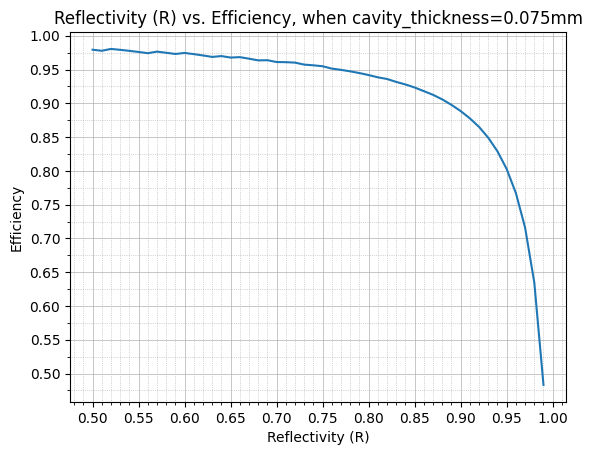

In [129]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Ensure this import is included
# Call the function for each R and store the results
cavity_thickness=0.075
R_values = np.arange(0.5, 1, 0.01)
sum_energy_values=[]
for R in R_values:
    _, sum_energy,_,_ = eff_calculator(R, cavity_thickness, PIC_width)
    sum_energy_values.append(sum_energy)
# Plotting the curve of R vs. sum_energy
import matplotlib.pyplot as plt
plt.plot(R_values, sum_energy_values)
plt.xlabel('Reflectivity (R)')
plt.ylabel('Efficiency')
plt.title('Reflectivity (R) vs. Efficiency, when cavity_thickness='+str(cavity_thickness)+"mm" )
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
# Setting finer major and minor ticks on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
# Setting finer major and minor ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
plt.show()

check the sum: 0.9903022627021246, if sum close to 0.99, then it means the step size is good
total reflection times = 44 times
total walk_length= 1.2367593453810446 in mm
[0.09999999999999998, 0.08999999999999998, 0.08099999999999999, 0.07289999999999999, 0.06560999999999999, 0.059049, 0.05314409999999999, 0.047829689999999994, 0.043046721, 0.0387420489, 0.03486784401, 0.031381059609, 0.028242953648100005, 0.025418658283290003, 0.022876792454961003, 0.020589113209464903, 0.01853020188851841, 0.016677181699666574, 0.015009463529699915, 0.013508517176729925, 0.012157665459056933, 0.010941898913151239, 0.009847709021836116]
reflection times when transmission drop to 0.1 of T0 = 22 times
efficiency=0.9190401365869242
check the sum: 0.9903022627021246, if sum close to 0.99, then it means the step size is good
total reflection times = 44 times
total walk_length= 3.710278036143134 in mm
[0.09999999999999998, 0.08999999999999998, 0.08099999999999999, 0.07289999999999999, 0.06560999999999999, 0

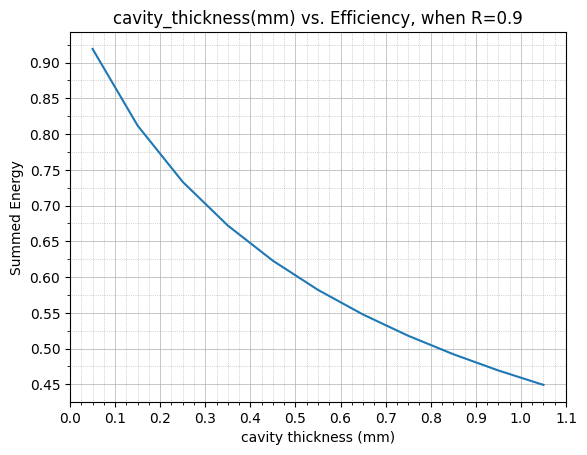

In [124]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Ensure this import is included
# Call the function for each R and store the results
R=0.9
cavity_thickness_arr = np.arange(0.05, 1.1, 0.1)
sum_energy_values=[]
for cavity_thickness in cavity_thickness_arr:
    _, sum_energy,_,_ = eff_calculator(R, cavity_thickness, PIC_width)
    sum_energy_values.append(sum_energy)
# Plotting the curve of R vs. sum_energy
import matplotlib.pyplot as plt
plt.plot(cavity_thickness_arr, sum_energy_values)
plt.xlabel('cavity thickness (mm)')
plt.ylabel('Summed Energy')
plt.title('cavity_thickness(mm) vs. Efficiency, when R='+str(R) )
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
# Setting finer major and minor ticks on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.025))
# Setting finer major and minor ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Ensure this import is included
# Call the function for each R and store the results
R_values = np.arange(0.1, 1, 0.05)
sum_energy_values=[]
for R in R_values:
    _, sum_energy = eff_calculator(R, cavity_thickness, PIC_width)
    sum_energy_values.append(sum_energy)
# Plotting the curve of R vs. sum_energy
import matplotlib.pyplot as plt
plt.plot(R_values, sum_energy_values)
plt.xlabel('Reflectivity (R)')
plt.ylabel('Summed Energy')
plt.title('Reflectivity (R) vs. Efficiency, when cavity_thickness='+str(cavity_thickness)+"mm" )
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
# Setting finer major and minor ticks on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.025))
# Setting finer major and minor ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
plt.show()

trade off in the system:
when R increase,
    for increasing reflection n number, the energy drop is slow
    means we will have more constant power for each z plane

But when R increase, 
    the total reflection times will increase, and high reflection order will have larger walk length
    mean we will have lower efficiency

In [62]:
for n in range(100,1000,100):
    # Add T*R**n to the sum
    print(n)

100
200
300
400
500
600
700
800
900


# consider the cone angle in glass

In [ ]:
angle_radians = np.radians(angle_degrees)
np.tan(angle_radians)

In [155]:
#snell's law

SyntaxError: EOF while scanning triple-quoted string literal (1180728707.py, line 2)

In [159]:

np.degrees(np.arcsin(np.sin(np.radians(12))/1.4))

8.540493181868676

In [ ]:
#+-12 degree in air corresponds to 8.5 degree in glass

# contrast 

In [ ]:
(0.7+0.7^2+0.7^3+...0.7^n)(1000)(0.1%)

In [173]:
def calculate_total(n):
    r = 0.7*0.99  # Common ratio
    # Calculate the sum of the geometric series starting from 0.7
    series_sum = r * (1 - r**n) / (1 - r)
    
    # Multiply by 1000 and then by 0.1%
    total = series_sum * 1000 * 0.001
    
    return total

# Example usage
n = 10  # You can change this value to any non-negative integer
result = calculate_total(n)
print(f"The result for n={n} is: {result}")

The result for n=10 is: 2.1996620106131366


In [170]:
import math

# Given cos^2(theta) = 0.9
cos_squared_theta = 0.95

# Calculate cos(theta)
cos_theta = math.sqrt(cos_squared_theta)

# Calculate theta in radians
theta_radians = math.acos(cos_theta)

# Convert theta from radians to degrees
theta_degrees = math.degrees(theta_radians)

# Since cosine is positive in both the first and fourth quadrants,
# we need to consider the symmetric angle in the fourth quadrant as well
theta_degrees_symmetric = 360 - theta_degrees

print(f"Theta is approximately {theta_degrees:.2f} degrees or {theta_degrees_symmetric:.2f} degrees")

Theta is approximately 12.92 degrees or 347.08 degrees


# Orc-optics Jones Matrix benchmark

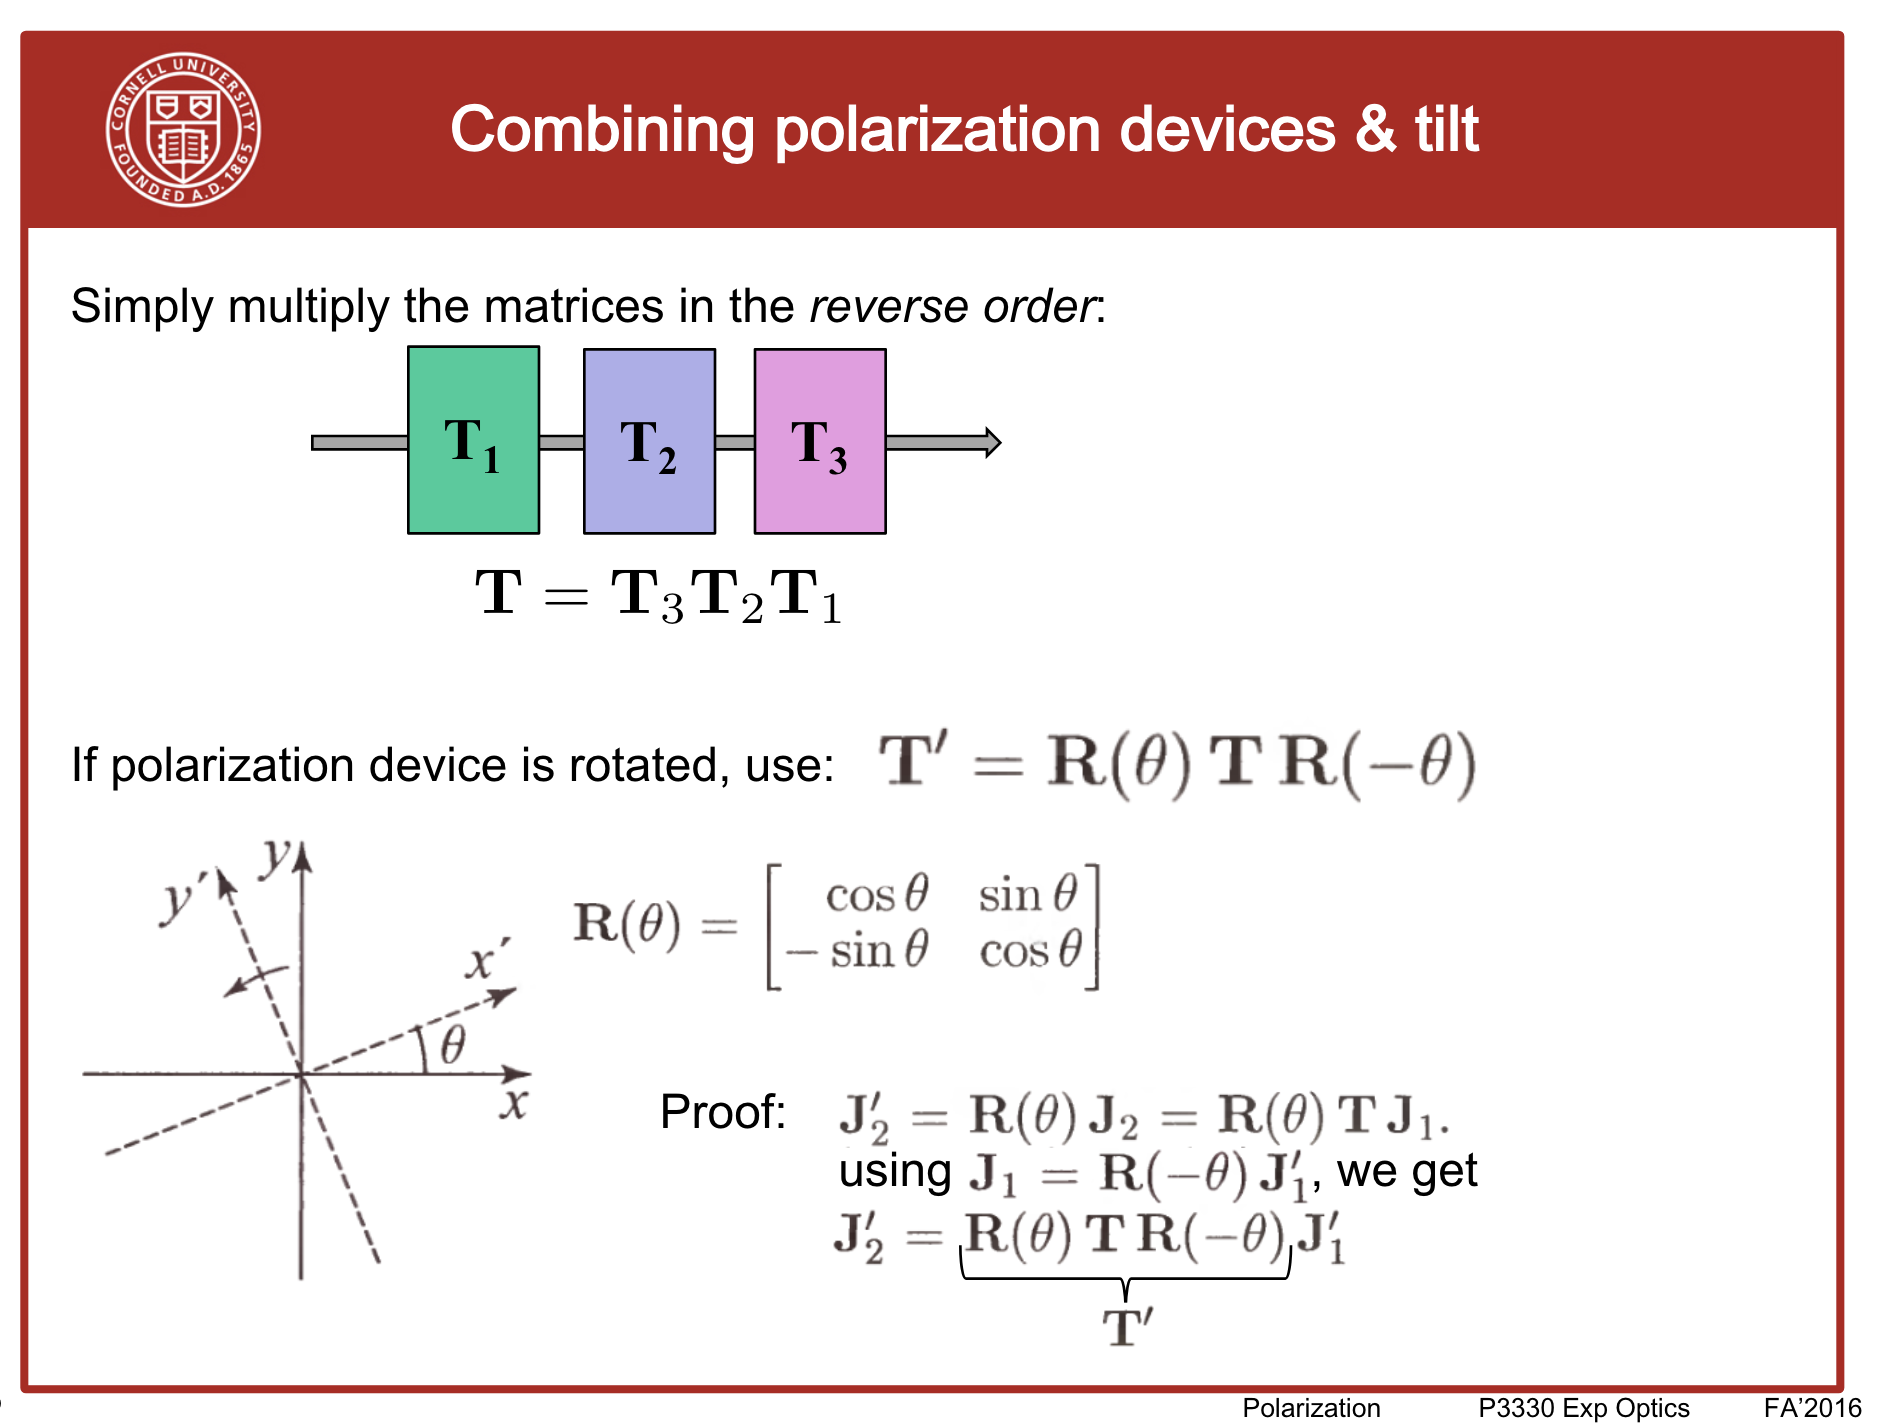

In [362]:
from IPython.display import Image

# Display the image
Image(filename='/Users/qingjunwang/Documents/image files/jones matrix/order.png', width=500, height=300)

In [363]:
#Linear polarized light in the x direction /horizontal
Jx=np.array([1, 0])
Jy=np.array([0, 1])

#lP in x direction  /horizontal
Jlpx=np.array([[1,0],[0,0]])
Jout1=np.dot(Jlpx,Jx) #along propogation direction

print(f'Jx:{Jx}')
print(f'Jx:{Jy}')
print(f'JLP_x:\n{Jlpx}')
print(f'\nJlp_x*Jx:{Jout1}')

Jx:[1 0]
Jx:[0 1]
JLP_x:
[[1 0]
 [0 0]]

Jlp_x*Jx:[1 0]


In [364]:
# Mirror JonesM
Jmirror=np.array([[-1,0],[0,-1]]) 

Joutx_mirror=np.dot(Jmirror, Jx) #along propogation direction
print(f'x polarized light after mirror:{Joutx_mirror}')
Jouty_mirror=np.dot(Jmirror, Jy) #along propogation direction
print(f'y polarized light after mirror:{Jouty_mirror}')

x polarized light after mirror:[-1  0]
y polarized light after mirror:[ 0 -1]


In [365]:
# RP x JonesM
JRPx=np.array([[-1,0],[0,1]])  #RP: x reflection, y transmission

Joutx_RP=np.dot(JRPx, Jx)
print(f'x polarized light after RPx: {Joutx_RP}')
Jouty_RP=np.dot(JRPx, Jy)
print(f'y polarized light after RPx: {Jouty_RP}')

x polarized light after RPx: [-1  0]
y polarized light after RPx: [0 1]


In [369]:
# RP x 90% JonesM

JRPx_90=np.array([[-0.9,0],[0.1,1]])  #RP 90%: x reflection, y transmission

Joutx_RP90=np.dot(JRPx_90, Jx)
print(f'x polarized light after RPx: {Joutx_RP90}')
Jouty_RP90=np.dot(JRPx_90, Jy)
print(f'y polarized light after RPx: {Jouty_RP90}')

x polarized light after RPx: [-0.9  0.1]
y polarized light after RPx: [0. 1.]


In [367]:
JQWP45@JQWP45

array([[0.+0.j        , 0.+0.99998082j],
       [0.+0.99998082j, 0.+0.j        ]])

In [368]:
# LCOS: should be QWP(45degree)+mirror+QWP(45degree)

JQWP45=np.array(
[
    [0.7071,  0.7071j],
    [0.7071j, 0.7071]
])

Jout_LCOS=JQWP45@Jmirror@JQWP45@Jx
#Jout_LCOS=JQWP45@JQWP45@Jx
print(f'x polarized light After LCOS on state:{Jout_LCOS}')

x polarized light After LCOS on state:[0.+0.j         0.-0.99998082j]
